1. Player
يحتوي على بيانات أساسية عن اللاعبين مثل:

player_api_id (معرف اللاعب)

player_name

تاريخ الميلاد، الطول، الوزن

يستخدم لتعريف كل لاعب بشكل فريد ويحتوي على معلومات شخصية أساسية.

2. Player_Attributes
يحتوي على إحصائيات ومعلومات أداء اللاعبين عبر الزمن (مواسم مختلفة أو مباريات مختلفة)، مثل:

مهارات فنية (التمرير، التسديد، السرعة، القوة، التهديف، ...الخ)

تقييمات أداء عامة

توقيت أو تاريخ هذه الإحصائيات

هذا الجدول يسمح بتحليل أداء اللاعب عبر الوقت وليس فقط بياناته الشخصية.

3. Match
يحتوي على تفاصيل كل مباراة لعبت في الفترة الزمنية المغطاة، مثل:

معرف المباراة

الفرق المشاركة (المنزلية والضيف)

أهداف كل فريق (home_team_goal و away_team_goal)

تاريخ المباراة

الدوري (league) أو البطولة التي تلعب فيها المباراة

نتائج أخرى مثل عدد التسديدات، السيطرة، إلخ (لو متوفرة)

هذا الجدول أساسي لتحليل نتائج المباريات والتنبؤ بها.

4. League
يحتوي على معلومات عن البطولات أو الدوريات المختلفة، مثل:

league_id

اسم الدوري (مثلاً Premier League، La Liga، إلخ)

البلد أو المنطقة التي ينتمي إليها الدوري

هذا الجدول يساعد في تصنيف المباريات حسب الدوري.

5. Country
يحتوي على أسماء الدول، عادةً مرتبط بالبطولات أو الفرق أو اللاعبين.

يساعد في تصنيف البيانات حسب البلد.

6. Team
يحتوي على بيانات الفرق المشاركة، مثل:

team_api_id

اسم الفريق (مثلاً Manchester United، Real Madrid)

معلومات إضافية قد تكون موجودة مثل تاريخ التأسيس، المدينة... إلخ

يستخدم لتعريف الفرق المشاركة في المباريات.

7. Team_Attributes
يحتوي على إحصائيات أداء الفرق على مدى الفترات الزمنية، مثل:

قوة الدفاع، الهجوم

التشكيلة المستخدمة

تقييمات عامة للفريق

تاريخ أو موسم تلك الإحصائيات

يساعد في تحليل أداء الفريق عبر الزمن وربطه بنتائج المباريات.



In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat as nbf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [100]:
import sqlite3


# 📂 Database path
db_path = "database.sqlite"

# 🔌 Connect to the database
conn = sqlite3.connect(db_path)

# 📜 Fetch all table names
tables_df = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
table_names = tables_df['name'].tolist()

# 📥 Read all tables and store them in a dictionary
dataframes = {}
for table in table_names:
    df = pd.read_sql(f"SELECT * FROM {table};", conn)
    dataframes[table] = df
    print(f"✅ Loaded table: {table} - Rows: {len(df)}")

# ❌ Close the connection
conn.close()



✅ Loaded table: sqlite_sequence - Rows: 7
✅ Loaded table: Player_Attributes - Rows: 183978
✅ Loaded table: Player - Rows: 11060
✅ Loaded table: Match - Rows: 25979
✅ Loaded table: League - Rows: 11
✅ Loaded table: Country - Rows: 11
✅ Loaded table: Team - Rows: 299
✅ Loaded table: Team_Attributes - Rows: 1458


In [101]:
for name, df in dataframes.items():
    print(f"{name}:")
    print(df.head(5))
    print(("=" * 40) + "\n")

sqlite_sequence:
      name     seq
0     Team  103916
1  Country   51958
2   League   51958
3    Match   51958
4   Player   11075

Player_Attributes:
   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right           

| العمود                | المعنى بالعربي                                    |
| --------------------- | ------------------------------------------------- |
| id                    | رقم تعريف الصف (ID فريد للسجل)                    |
| player\_fifa\_api\_id | رقم تعريف اللاعب في قاعدة بيانات FIFA API         |
| player\_api\_id       | رقم تعريف اللاعب في قاعدة بيانات API عامة         |
| date                  | تاريخ التقييم (تاريخ تسجيل البيانات)              |
| overall\_rating       | تقييم عام للاعب (مستوى أداء اللاعب الكلي)         |
| potential             | الإمكانيات المستقبلية للاعب (تقييم قدرة التحسن)   |
| preferred\_foot       | القدم المفضلة (right = اليمنى، left = اليسرى)     |
| attacking\_work\_rate | معدل العمل الهجومي (مستوى نشاط اللاعب في الهجوم)  |
| defensive\_work\_rate | معدل العمل الدفاعي (مستوى نشاط اللاعب في الدفاع)  |
| crossing              | مهارة التمرير العرضي (تمرير الكرة من الأطراف)     |
| finishing             | مهارة التسديد وإنهاء الهجمات                      |
| heading\_accuracy     | دقة الرأس (التسديد بالرأس)                        |
| short\_passing        | مهارة التمرير القصير                              |
| volleys               | مهارة التسديد الطائر (Volley)                     |
| dribbling             | مهارة المراوغة بالكرة                             |
| curve                 | مهارة تدوير الكرة عند التسديد                     |
| free\_kick\_accuracy  | دقة الركلات الحرة                                 |
| long\_passing         | مهارة التمرير الطويل                              |
| ball\_control         | مهارة السيطرة على الكرة                           |
| acceleration          | سرعة التسارع                                      |
| sprint\_speed         | سرعة الركض السريع                                 |
| agility               | رشاقة الحركة                                      |
| reactions             | ردود الأفعال (سرعة الاستجابة للمواقف)             |
| balance               | توازن اللاعب                                      |
| shot\_power           | قوة التسديد                                       |
| jumping               | ارتفاع القفز                                      |
| stamina               | القدرة على التحمل                                 |
| strength              | القوة البدنية                                     |
| long\_shots           | مهارة التسديد من بعيد                             |
| aggression            | درجة العدوانية في اللعب                           |
| interceptions         | مهارة اعتراض الكرة                                |
| positioning           | التمركز الصحيح في الملعب                          |
| vision                | الرؤية التكتيكية (تمريرات وإدراك اللعب)           |
| penalties             | مهارة تنفيذ ركلات الجزاء                          |
| marking               | مهارة التغطية الدفاعية (المراقبة على المنافسين)   |
| standing\_tackle      | مهارة التدخل الوقفي (الوقوف في التدخلات الدفاعية) |
| sliding\_tackle       | مهارة التدخل بالانزلاق                            |
| gk\_diving            | مهارة الغوص للحارس (للحراس فقط)                   |
| gk\_handling          | مهارة التصدي باليد (للحراس فقط)                   |
| gk\_kicking           | مهارة الركل (للحراس فقط)                          |
| gk\_positioning       | تمركز الحارس                                      |
| gk\_reflexes          | ردود فعل الحارس                                   |


In [102]:
#1. Player_Attributes
"""
يحتوي على إحصائيات ومعلومات أداء اللاعبين عبر الزمن (مواسم مختلفة أو مباريات مختلفة)، مثل:

مهارات فنية (التمرير، التسديد، السرعة، القوة، التهديف، ...الخ)

تقييمات أداء عامة

توقيت أو تاريخ هذه الإحصائيات

هذا الجدول يسمح بتحليل أداء اللاعب عبر الوقت وليس فقط بياناته الشخصية.
"""

D_Player_Attributes = dataframes['Player_Attributes']
D_Player_Attributes


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [103]:
D_Player_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [104]:
D_Player_Attributes.duplicated().sum()  # Check for duplicate rows

np.int64(0)

In [105]:
D_Player_Attributes.isnull().sum()  # Check for missing values

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [106]:
D_Player_Attributes.dropna(inplace=True)  # Remove rows with missing values

In [107]:
D_Player_Attributes.isnull().sum()  # Check for missing values again

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [108]:
D_Player_Attributes['date']=pd.to_datetime(D_Player_Attributes['date'], errors='coerce')

In [109]:
D_Player_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   180354 non-null  int64         
 1   player_fifa_api_id   180354 non-null  int64         
 2   player_api_id        180354 non-null  int64         
 3   date                 180354 non-null  datetime64[ns]
 4   overall_rating       180354 non-null  float64       
 5   potential            180354 non-null  float64       
 6   preferred_foot       180354 non-null  object        
 7   attacking_work_rate  180354 non-null  object        
 8   defensive_work_rate  180354 non-null  object        
 9   crossing             180354 non-null  float64       
 10  finishing            180354 non-null  float64       
 11  heading_accuracy     180354 non-null  float64       
 12  short_passing        180354 non-null  float64       
 13  volleys            

In [110]:
# Define the list of columns you want to inspect
columns_to_check = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

# Loop through each column and print its unique values
for column_name in columns_to_check:
    Count_values = D_Player_Attributes[column_name].value_counts()
    print(f"Count_values for '{column_name}': {Count_values}\n")


Count_values for 'preferred_foot': preferred_foot
right    136247
left      44107
Name: count, dtype: int64

Count_values for 'attacking_work_rate': attacking_work_rate
medium    125070
high       42823
low         8569
None        3317
norm         317
y             94
stoc          86
le            78
Name: count, dtype: int64

Count_values for 'defensive_work_rate': defensive_work_rate
medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: count, dtype: int64



In [111]:
# تعريف القيم الغير قياسية لـ attacking_work_rate
invalid_attacking = ['None', 'norm', 'y', 'stoc', 'le']

# تعريف القيم الغير قياسية لـ defensive_work_rate
invalid_defensive = ['o', '1', '2', 'ormal', '3', '5', '7', '0', '6', '9', '4', 'es', 'tocky', 'ean', '8']

# مسح الصفوف اللي فيها قيم غير قياسية من attacking_work_rate
D_Player_Attributes = D_Player_Attributes[~D_Player_Attributes['attacking_work_rate'].isin(invalid_attacking)]

# مسح الصفوف اللي فيها قيم غير قياسية من defensive_work_rate
D_Player_Attributes = D_Player_Attributes[~D_Player_Attributes['defensive_work_rate'].isin(invalid_defensive)]

# تعريف الأعمدة اللي عايز تتفقدها
columns_to_check = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

# لوب على كل عمود وطباعة القيم الفريدة مع العدد
for column_name in columns_to_check:
    Count_values = D_Player_Attributes[column_name].value_counts()
    print(f"Count_values for '{column_name}':\n{Count_values}\n")

Count_values for 'preferred_foot':
preferred_foot
right    133102
left      43059
Name: count, dtype: int64

Count_values for 'attacking_work_rate':
attacking_work_rate
medium    124871
high       42751
low         8539
Name: count, dtype: int64

Count_values for 'defensive_work_rate':
defensive_work_rate
medium    130764
high       26972
low        18425
Name: count, dtype: int64



In [112]:
D_preferred_foot = D_Player_Attributes['preferred_foot'].value_counts().reset_index()
D_preferred_foot


,preferred_foot,count
0,right,133102
1,left,43059


In [113]:
FIG = px.bar(
    D_preferred_foot,
    x = 'preferred_foot',
    y = 'count',
    title= 'Right And Left',
    text = 'count',
    color='preferred_foot'
)
FIG.show()

In [114]:
FIG = px.pie(
    D_preferred_foot,
    values = 'count',
    names = 'preferred_foot',
    title = 'Right And Left',
    hole = 0.5
)
FIG.show()

In [115]:
D_attacking_work_rate = D_Player_Attributes['attacking_work_rate'].value_counts().reset_index()
D_attacking_work_rate

,attacking_work_rate,count
0,medium,124871
1,high,42751
2,low,8539


In [116]:
FIG = px.bar(
    D_attacking_work_rate,
    x = 'attacking_work_rate',
    y = 'count',
    title= 'Attacking Work Rate',
    text = 'count',
    color='attacking_work_rate'
)
FIG.show()


In [117]:
FIG = px.pie(
    D_attacking_work_rate,
    names='attacking_work_rate',
    values='count',
    title='Distribution of Attacking Work Rate',
    color='attacking_work_rate',
    hole = 0.5
)
FIG.show()

In [118]:
D_defensive_work_rate = D_Player_Attributes['defensive_work_rate'].value_counts().reset_index()
D_defensive_work_rate

,defensive_work_rate,count
0,medium,130764
1,high,26972
2,low,18425


In [119]:
FIG = px.bar(
    D_defensive_work_rate,
    x = 'defensive_work_rate',
    y = 'count',
    title= 'Defensive Work Rate',
    text = 'count',
    color='defensive_work_rate'
)
FIG.show()


In [120]:
FIG = px.pie(
    D_defensive_work_rate,
    names='defensive_work_rate',
    values='count',
    title='Distribution of Defensive Work Rate',
    color='defensive_work_rate',
    hole = 0.5
)
FIG.show()

In [121]:
# تعريف الـ mappings لكل عمود
preferred_foot_mapping = {'right': 1, 'left': 0}
work_rate_mapping = {'high': 2, 'medium': 1, 'low': 0}

# تطبيق الـ mapping على الأعمدة
D_Player_Attributes['preferred_foot'] = D_Player_Attributes['preferred_foot'].map(preferred_foot_mapping)
D_Player_Attributes['attacking_work_rate'] = D_Player_Attributes['attacking_work_rate'].map(work_rate_mapping)
D_Player_Attributes['defensive_work_rate'] = D_Player_Attributes['defensive_work_rate'].map(work_rate_mapping)

# تعريف الأعمدة اللي عايز تتفقدها
columns_to_check = ['preferred_foot', 'attacking_work_rate', 'defensive_work_rate']

# لوب على كل عمود وطباعة القيم الفريدة مع العدد بعد الـ mapping
for column_name in columns_to_check:
    count_values = D_Player_Attributes[column_name].value_counts()
    print(f"Count_values for '{column_name}' after mapping:\n{count_values}\n")

Count_values for 'preferred_foot' after mapping:
preferred_foot
1    133102
0     43059
Name: count, dtype: int64

Count_values for 'attacking_work_rate' after mapping:
attacking_work_rate
1    124871
2     42751
0      8539
Name: count, dtype: int64

Count_values for 'defensive_work_rate' after mapping:
defensive_work_rate
1    130764
2     26972
0     18425
Name: count, dtype: int64



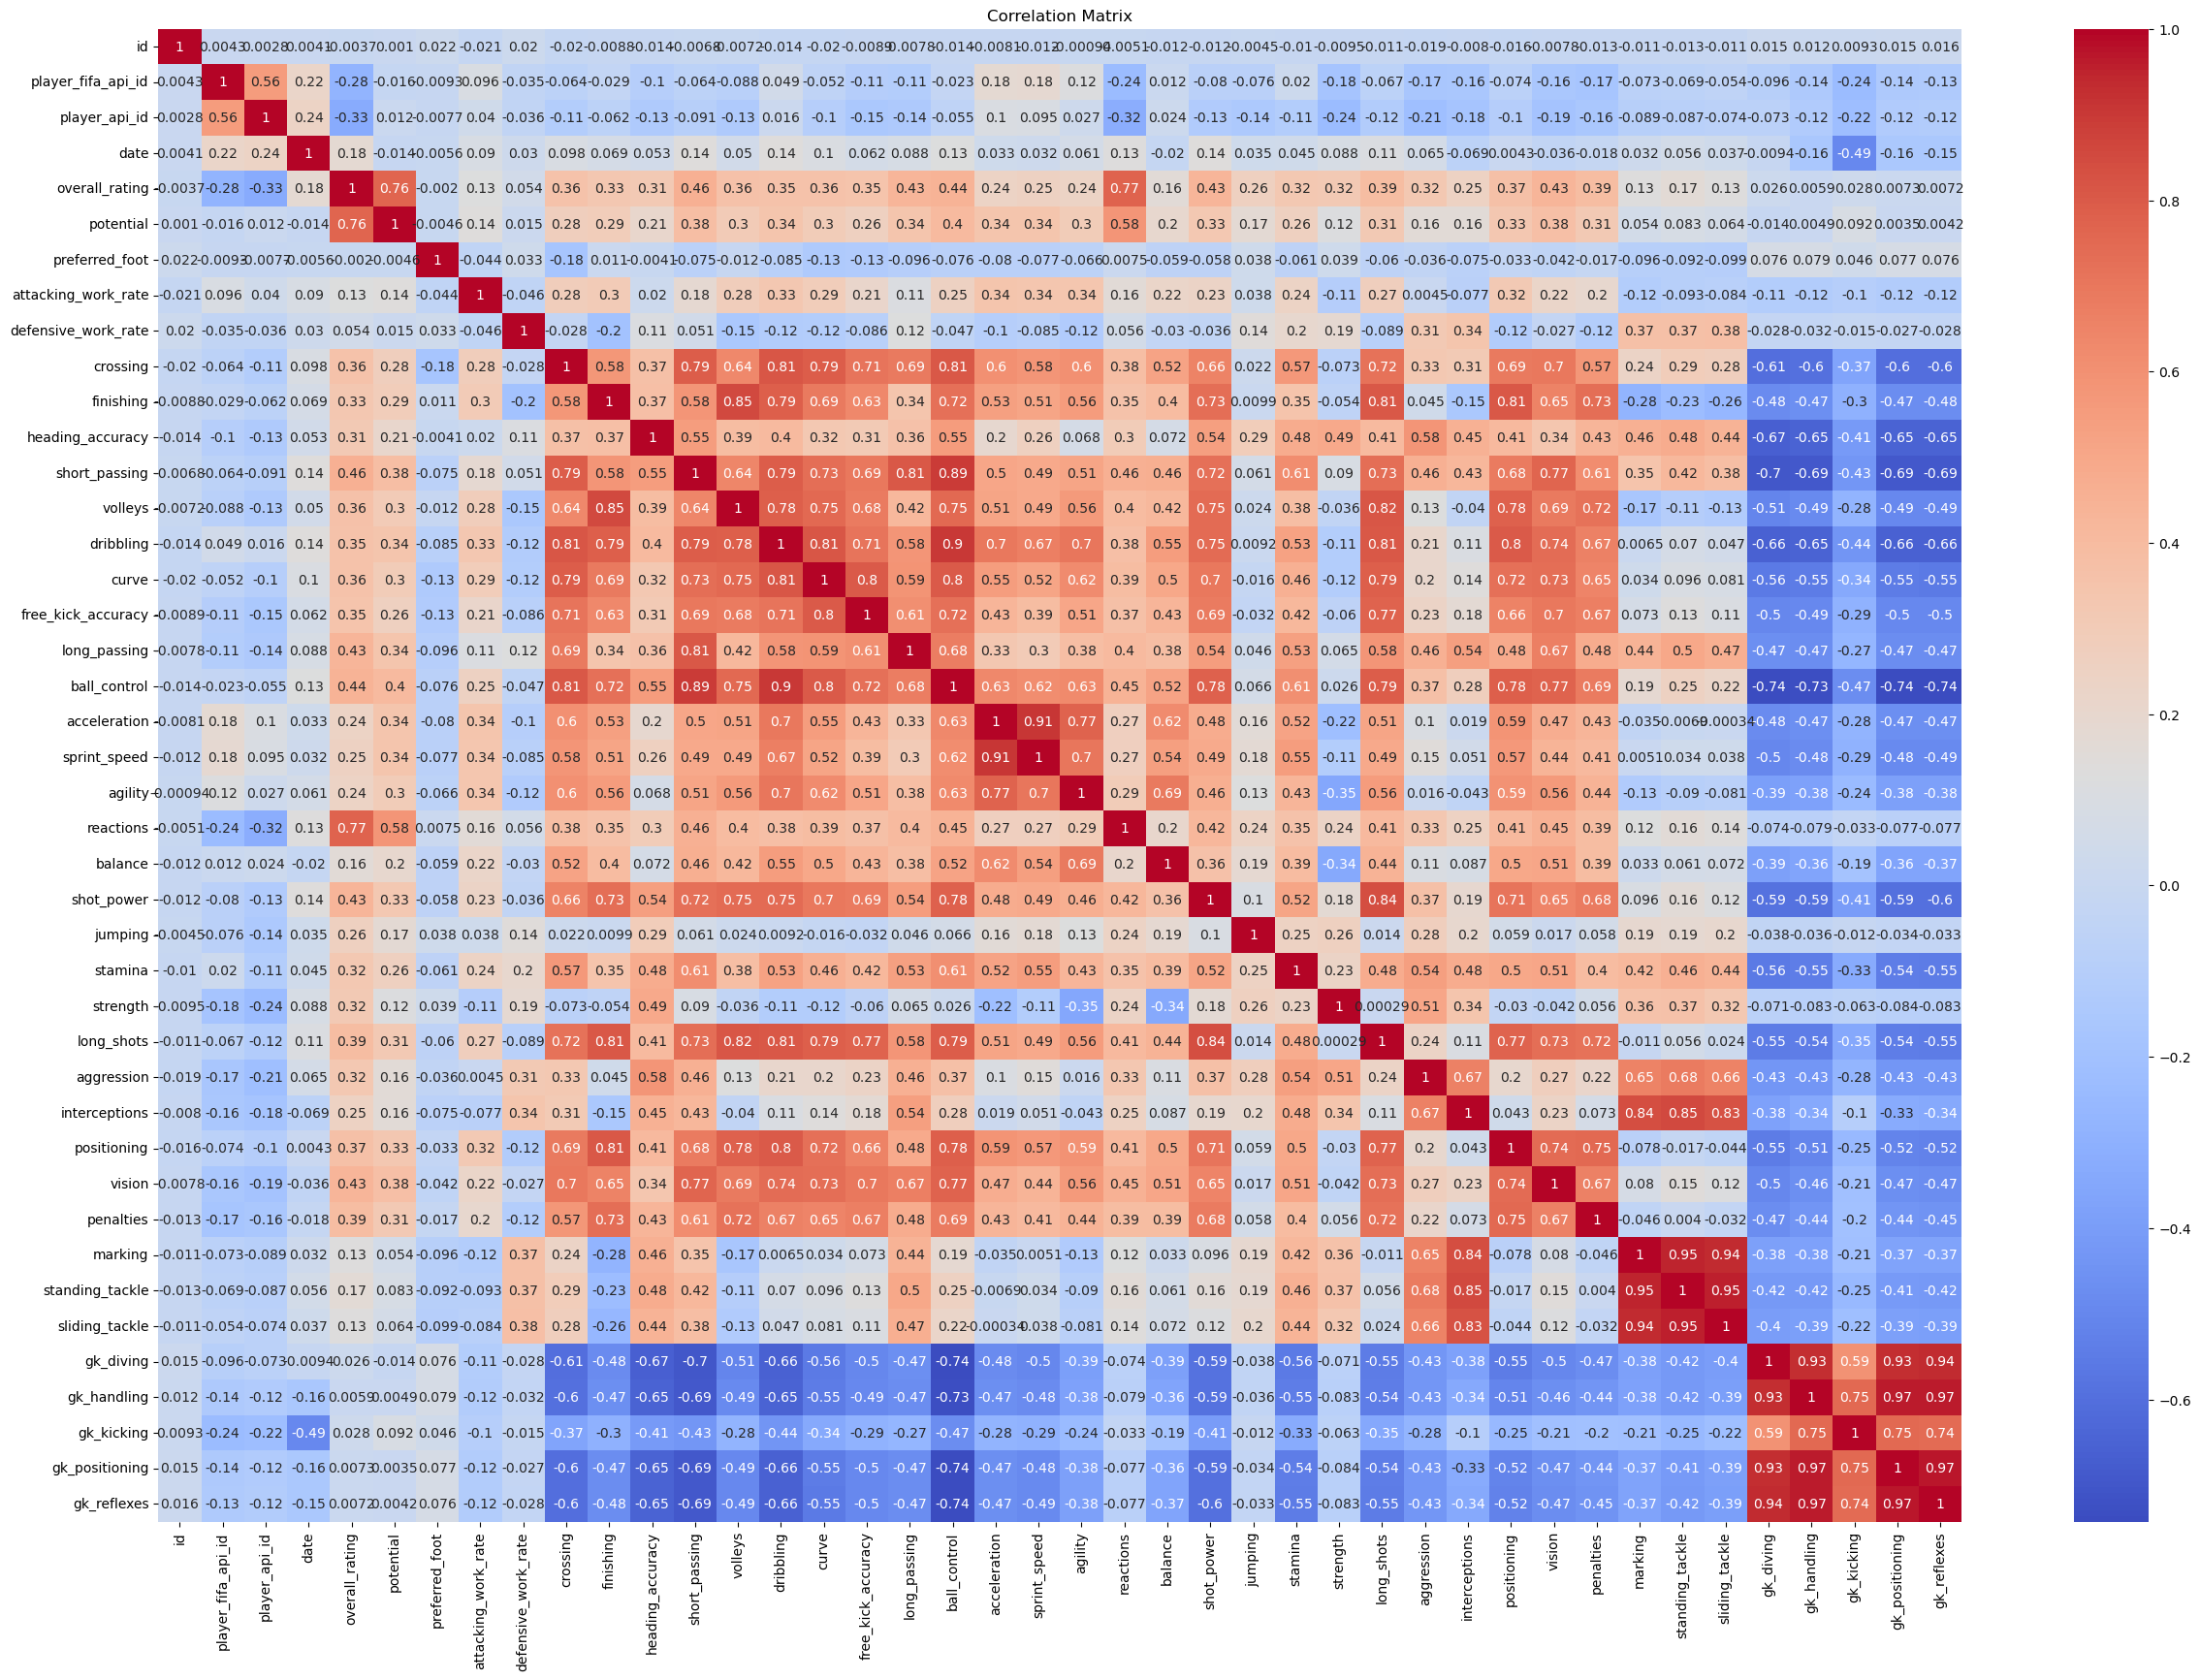

In [122]:
plt.figure(figsize=(30,20))
sns.heatmap(D_Player_Attributes.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()